In [0]:
#Installing the dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #ML dependency that contains lots of ML libraries.
from sklearn.svm import SVR #SupportVectorRegressor
import matplotlib.pyplot as plt

In [0]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('AAPL1.csv')
df.head(7)

Saving AAPL1.csv to AAPL1 (1).csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-10,277.140015,286.440002,269.369995,285.339996,285.339996,71322500
1,2020-03-11,277.390015,281.220001,271.859985,275.429993,275.429993,63899700
2,2020-03-12,255.940002,270.000000,248.000000,248.229996,248.229996,104618500
3,2020-03-13,264.890015,279.920013,252.949997,277.970001,277.970001,92683000
4,2020-03-16,241.949997,259.079987,240.000000,242.210007,242.210007,80605900
5,2020-03-17,247.509995,257.609985,238.399994,252.860001,252.860001,81014000
6,2020-03-18,239.770004,250.000000,237.119995,246.669998,246.669998,75058400


In [0]:
#Create the lists X and Y data sets
dates = []
prices = []

In [0]:
#Get the number of rows and columns in the data set
df.shape

(23, 7)

In [0]:
#Displaying Last row
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
22,2020-04-09,268.700012,270.070007,264.700012,267.98999,267.98999,40529100


In [0]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-10,277.140015,286.440002,269.369995,285.339996,285.339996,71322500
1,2020-03-11,277.390015,281.220001,271.859985,275.429993,275.429993,63899700
2,2020-03-12,255.940002,270.000000,248.000000,248.229996,248.229996,104618500
3,2020-03-13,264.890015,279.920013,252.949997,277.970001,277.970001,92683000
4,2020-03-16,241.949997,259.079987,240.000000,242.210007,242.210007,80605900
5,2020-03-17,247.509995,257.609985,238.399994,252.860001,252.860001,81014000
6,2020-03-18,239.770004,250.000000,237.119995,246.669998,246.669998,75058400
7,2020-03-19,247.389999,252.839996,242.610001,244.779999,244.779999,67964300
8,2020-03-20,247.179993,251.830002,228.000000,229.240005,229.240005,100423300
9,2020-03-23,228.080002,228.500000,212.610001,224.369995,224.369995,84188200


In [0]:
#To check whether the last row is omitted or not
df.shape

(22, 7)

In [0]:
#Get all of the rows from the Date Column
df_dates = df.loc[:, 'Date']
#Get all of the rows from the Open Column
df_open = df.loc[:, 'Open']

In [0]:
#Create the independent data set X
for date in df_dates:
  dates.append( [int(date.split('-')[2])])
  
#Create the dependent data se 'y'
for open_price in df_open:
  prices.append(float(open_price))

In [0]:
#Printing all the dates in the updated date list
print(df_dates)

0     2020-03-10
1     2020-03-11
2     2020-03-12
3     2020-03-13
4     2020-03-16
5     2020-03-17
6     2020-03-18
7     2020-03-19
8     2020-03-20
9     2020-03-23
10    2020-03-24
11    2020-03-25
12    2020-03-26
13    2020-03-27
14    2020-03-30
15    2020-03-31
16    2020-04-01
17    2020-04-02
18    2020-04-03
19    2020-04-06
20    2020-04-07
21    2020-04-08
Name: Date, dtype: object


In [0]:
#Create the independent data set X
for date in df_dates:
  dates.append( [int(date.split('-')[2])])
  
#Create the dependent data se 'y'
for open_price in df_open:
  prices.append(float(open_price))

In [0]:
print(dates)

[[10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [31], [1], [2], [3], [6], [7], [8], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [31], [1], [2], [3], [6], [7], [8]]


In [0]:
def predict_prices(dates, prices, x):
  
  #Creaing the 3 SVR models
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Training the SVR models 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #Creating the Linear Regression model
  lin_reg = LinearRegression()
  #Training the Linear Regression model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

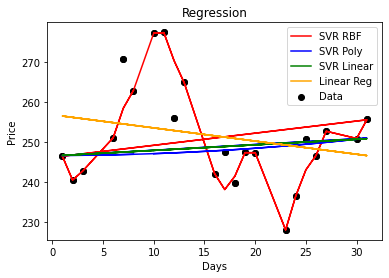

(269.33979828559785, 247.7144841379676, 246.95917627940185, 253.80782867301866)


In [0]:
#Predict the price of Apple on 09 April
predicted_price = predict_prices(dates, prices, [[9]])
print(predicted_price)